In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
os.listdir(".")
# os.chdir("drive/My Drive/Colab_Test/Dataset/Regression")

['winequality-white.csv', 'bottle.csv', 'housing.csv', 'auto.csv']

In [ ]:
dataset = pd.read_csv("housing.csv")

dataset.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
dataset.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe5d93ffef0>,
      dtype=object)

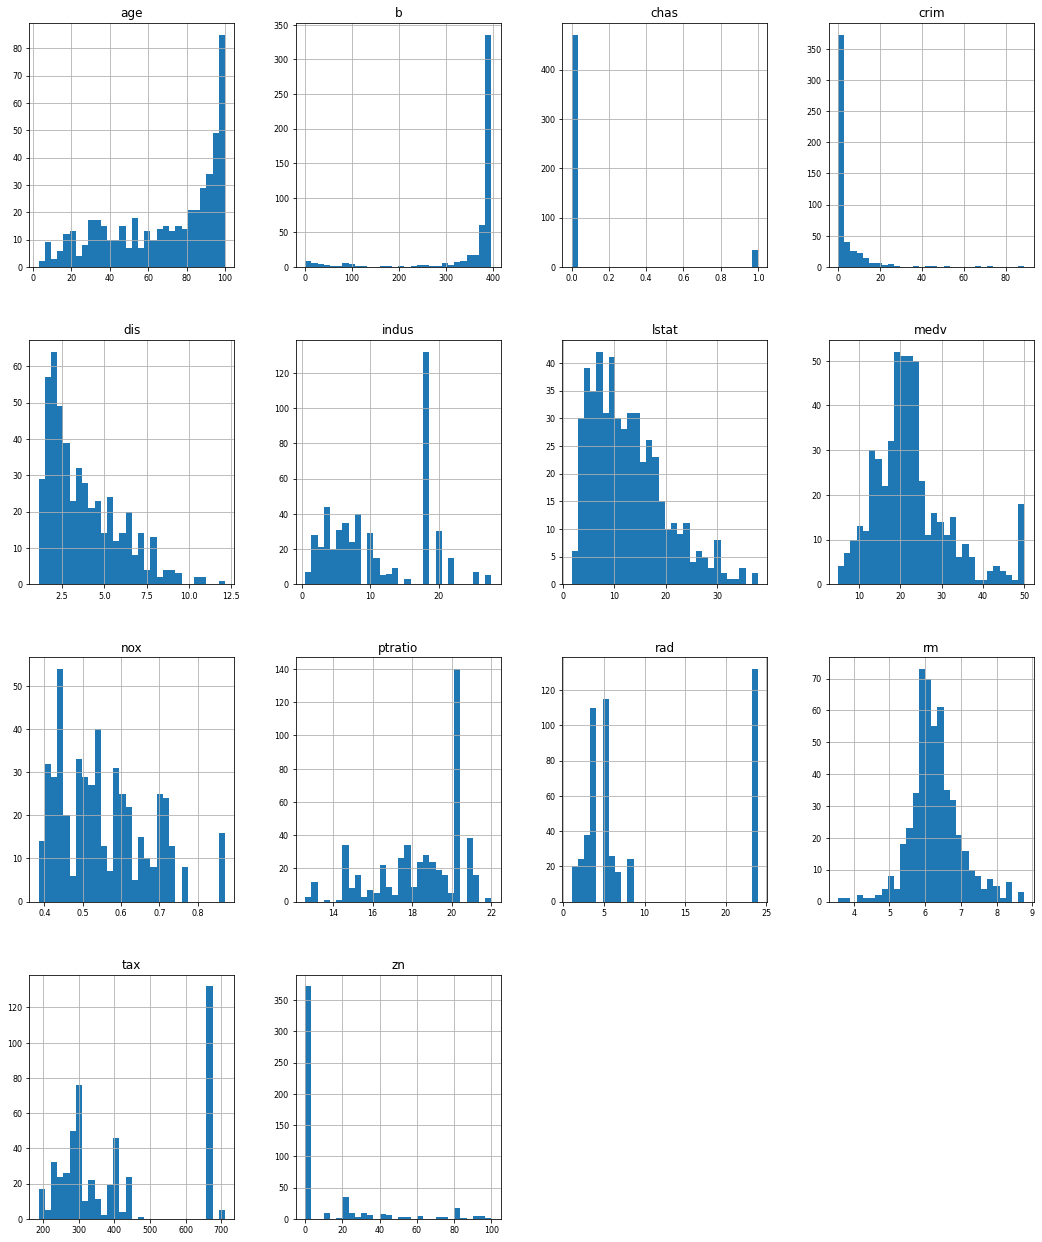

In [ ]:
dataset.hist(figsize=(18, 22), bins = 30, xlabelsize = 8, ylabelsize=8)

In [ ]:
dataset.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [ ]:
dataset.corr()['medv'][:-1]

crim      -0.388305
zn         0.360445
indus     -0.483725
chas       0.175260
nox       -0.427321
rm         0.695360
age       -0.376955
dis        0.249929
rad       -0.381626
tax       -0.468536
ptratio   -0.507787
b          0.333461
lstat     -0.737663
Name: medv, dtype: float64

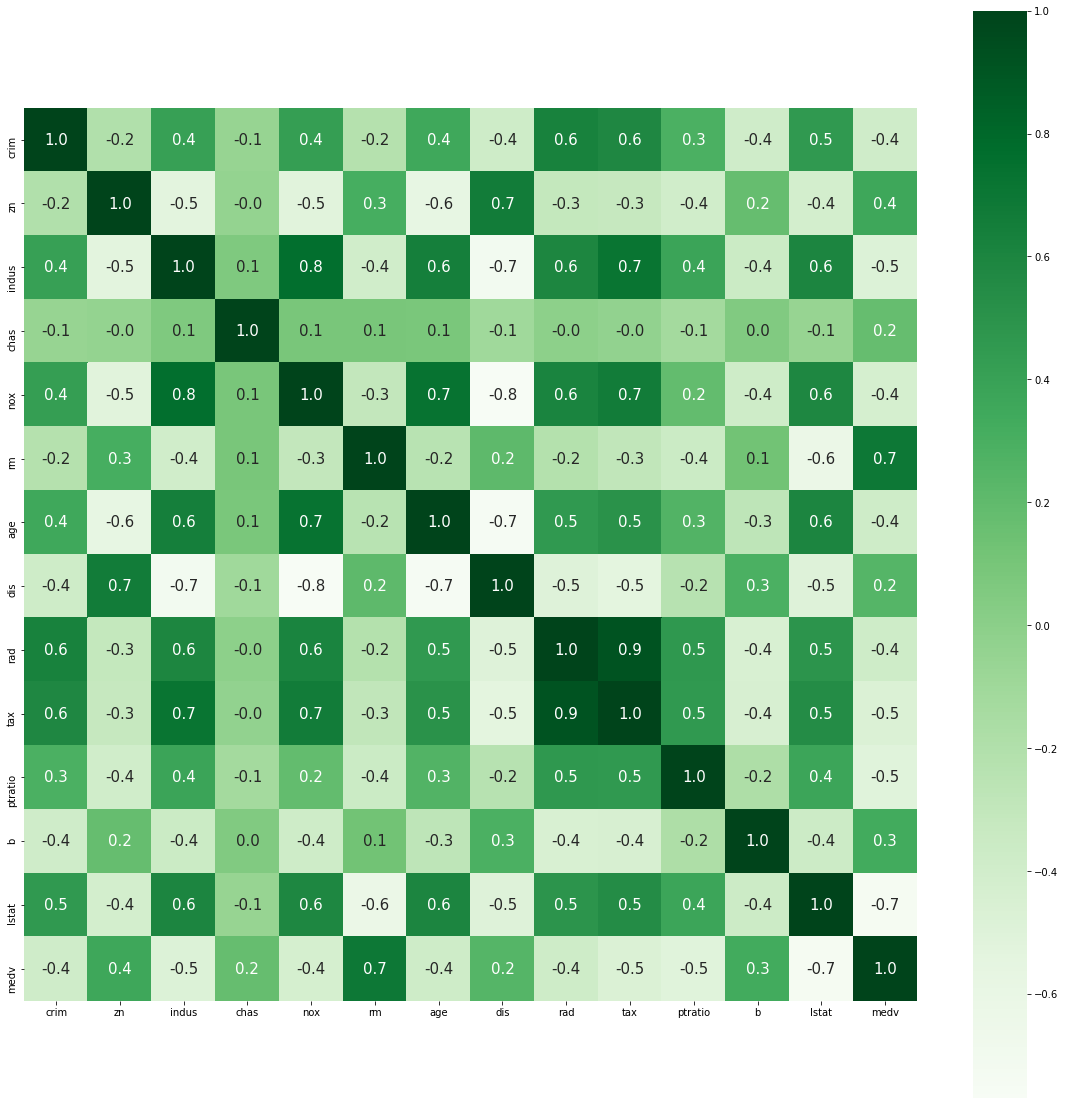

In [ ]:
corr = dataset.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar = True, square = True, fmt='.1f', annot = True, annot_kws = {'size' : 15}, cmap='Greens')

In [ ]:
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
label = dataset['medv']
features = dataset.drop(['medv'], axis=1)

**1. Transform Preprocessing**

In [ ]:
from sklearn.preprocessing import StandardScaler , PowerTransformer, QuantileTransformer, MinMaxScaler, RobustScaler, MaxAbsScaler
pre_proc = [StandardScaler(), PowerTransformer(method='yeo-johnson', standardize = True), QuantileTransformer(), MinMaxScaler(), MaxAbsScaler(), RobustScaler()]

for proc in pre_proc : 
  scaler = proc
  features_scaled = scaler.fit_transform(features.values)
  label_scaled = scaler.fit_transform(label.values.reshape(-1,1)).flatten()
  
  from sklearn.model_selection import train_test_split
  feature_train, feature_test, label_train, label_test = train_test_split(features_scaled, label_scaled, test_size=0.25, random_state=10)

  linear_reg = LinearRegression()

  linear_reg.fit(feature_train, label_train)
  predictions = linear_reg.predict(feature_test)
  
  mse = round(mean_squared_error(label_test, predictions),10)
  mae = round(mean_absolute_error(label_test, predictions),10)
  r2 = round(r2_score(label_test, predictions),10)
  rmse = round(np.sqrt(mean_squared_error(label_test, predictions)),10)

  text = str(proc)
  text1 = text.split('(')[0]


  print(f"Preprocessing dengan model      -> {text1}")
  print(f"MSE (Mean Squared Error)        : {mse}")
  print(f"MAE (Mean Absolute Error)       : {mae}")
  print(f"r^2 score                       : {r2}")
  print(f'RMSE (Root Mean Squared Error)  : {rmse}\n')

Preprocessing dengan model      -> StandardScaler
MSE (Mean Squared Error)        : 0.3843011995
MAE (Mean Absolute Error)       : 0.4198189009
r^2 score                       : 0.6745585066
RMSE (Root Mean Squared Error)  : 0.6199203171

Preprocessing dengan model      -> PowerTransformer
MSE (Mean Squared Error)        : 0.2376973013
MAE (Mean Absolute Error)       : 0.3507403782
r^2 score                       : 0.7659515234
RMSE (Root Mean Squared Error)  : 0.4875421021

Preprocessing dengan model      -> QuantileTransformer
MSE (Mean Squared Error)        : 0.0193452875
MAE (Mean Absolute Error)       : 0.1032740261
r^2 score                       : 0.7677708184
RMSE (Root Mean Squared Error)  : 0.1390873376

Preprocessing dengan model      -> MinMaxScaler
MSE (Mean Squared Error)        : 0.0160210058
MAE (Mean Absolute Error)       : 0.085717798
r^2 score                       : 0.6745585066
RMSE (Root Mean Squared Error)  : 0.1265741118

Preprocessing dengan model      -> MaxAb

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (506). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (506). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


**Untuk Metode Box-Cox, tidak digunakan karena Box-Cox hanya akan menjalankan apabila dataset tidak ada angka 0. Jadi apabila di jalankan pada case ini, Box-Cox akan error**

**Pada case ini, QuantileTransformer merupakan scaler yang terbaik dengan r2 0.7677708184**

**2. Masukan kedalam Algoritma**

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.PowerTransformer(method='yeo-johnson')

features_scaled = scaler.fit_transform(features.values)
label_scaled = scaler.fit_transform(label.values.reshape(-1,1)).flatten()

from sklearn.model_selection import train_test_split
feature_train, feature_test, label_train, label_test = train_test_split(features_scaled, label_scaled, test_size=0.25, random_state=10)


In [ ]:
for i in range(10, 501, 20) :
  print("Random Forest Regressor, dengan n_estimators = ",i)
  forest_reg = RandomForestRegressor(n_estimators=i, random_state=10, max_features='sqrt')
  forest_reg.fit(feature_train, label_train)
  predictions = forest_reg.predict(feature_test)
  print(f"r^2 score Random Forest Regressor                       : {r2_score(label_test, predictions)}")
  print(f'RMSE (Root Mean Squared Error) Random Forest Regressor  : {np.sqrt(mean_squared_error(label_test, predictions))}\n')

Random Forest Regressor, dengan n_estimators =  10
r^2 score Random Forest Regressor                       : 0.8356915979949164
RMSE (Root Mean Squared Error) Random Forest Regressor  : 0.40849721704018666

Random Forest Regressor, dengan n_estimators =  30
r^2 score Random Forest Regressor                       : 0.8663924729469605
RMSE (Root Mean Squared Error) Random Forest Regressor  : 0.3683618785283358

Random Forest Regressor, dengan n_estimators =  50
r^2 score Random Forest Regressor                       : 0.8638284855651474
RMSE (Root Mean Squared Error) Random Forest Regressor  : 0.3718795955640896

Random Forest Regressor, dengan n_estimators =  70
r^2 score Random Forest Regressor                       : 0.865117685529678
RMSE (Root Mean Squared Error) Random Forest Regressor  : 0.3701150293560231

Random Forest Regressor, dengan n_estimators =  90
r^2 score Random Forest Regressor                       : 0.8631491935566021
RMSE (Root Mean Squared Error) Random Forest Reg

In [ ]:
for i in range(1, 501, 5) :
  print("XGBRegressor, dengan n_estimators = ",i)
  xg_reg = xgb.XGBRegressor(objective='reg:linear', n_estimators=i)
  xg_reg.fit(feature_train, label_train)
  predictions = xg_reg.predict(feature_test)
  print(f"r^2 score XGBRegressor                       : {r2_score(label_test, predictions)}")
  print(f'RMSE (Root Mean Squared Error) XGBRegressor  : {np.sqrt(mean_squared_error(label_test, predictions))}\n')

XGBRegressor, dengan n_estimators =  1
[08:21:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
r^2 score XGBRegressor                       : 0.06321232584937153
RMSE (Root Mean Squared Error) XGBRegressor  : 0.9753933719898533

XGBRegressor, dengan n_estimators =  6
[08:21:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
r^2 score XGBRegressor                       : 0.5225155408529141
RMSE (Root Mean Squared Error) XGBRegressor  : 0.696368049440349

XGBRegressor, dengan n_estimators =  11
[08:21:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
r^2 score XGBRegressor                       : 0.7122374885847916
RMSE (Root Mean Squared Error) XGBRegressor  : 0.5406003515231242

XGBRegressor, dengan n_estimators =  16
[08:21:45] WARNING: /workspace/src/objective/regression_obj.cu

In [ ]:
kernel = ['linear', 'poly', 'rbf', 'sigmoid']

for i in kernel :
  print("SVR, dengan n_estimators = ",i)
  svr_reg = SVR(kernel = i,C=1.0, epsilon=0.2)
  svr_reg.fit(feature_train, label_train)
  predictions = svr_reg.predict(feature_test)
  print(f"r^2 score SVR                      : {r2_score(label_test, predictions)}")
  print(f'RMSE (Root Mean Squared Error) SVR : {np.sqrt(mean_squared_error(label_test, predictions))}\n')


SVR, dengan n_estimators =  linear
r^2 score SVR                      : 0.7406239421662397
RMSE (Root Mean Squared Error) SVR : 0.5132443283459657

SVR, dengan n_estimators =  poly
r^2 score SVR                      : 0.7899799957693553
RMSE (Root Mean Squared Error) SVR : 0.4618378765290829

SVR, dengan n_estimators =  rbf
r^2 score SVR                      : 0.8367711257005777
RMSE (Root Mean Squared Error) SVR : 0.40715306549914176

SVR, dengan n_estimators =  sigmoid
r^2 score SVR                      : -19.957483054820518
RMSE (Root Mean Squared Error) SVR : 4.6134814428972595



In [ ]:
for i in range(1, 301, 5) :
  print("KNN Regressor, dengan n_neighbors = ",i)
  knn_reg = KNeighborsRegressor(n_neighbors=1)
  knn_reg.fit(feature_train, label_train)
  predictions = knn_reg.predict(feature_test)
  print(f"r^2 score KNN Regressor                       : {r2_score(label_test, predictions)}")
  print(f'RMSE (Root Mean Squared Error) KNN Regressor  : {np.sqrt(mean_squared_error(label_test, predictions))}\n')



KNN Regressor, dengan n_neighbors =  1
r^2 score KNN Regressor                       : 0.7384148161178734
RMSE (Root Mean Squared Error) KNN Regressor  : 0.5154253650995126

KNN Regressor, dengan n_neighbors =  6
r^2 score KNN Regressor                       : 0.7384148161178734
RMSE (Root Mean Squared Error) KNN Regressor  : 0.5154253650995126

KNN Regressor, dengan n_neighbors =  11
r^2 score KNN Regressor                       : 0.7384148161178734
RMSE (Root Mean Squared Error) KNN Regressor  : 0.5154253650995126

KNN Regressor, dengan n_neighbors =  16
r^2 score KNN Regressor                       : 0.7384148161178734
RMSE (Root Mean Squared Error) KNN Regressor  : 0.5154253650995126

KNN Regressor, dengan n_neighbors =  21
r^2 score KNN Regressor                       : 0.7384148161178734
RMSE (Root Mean Squared Error) KNN Regressor  : 0.5154253650995126

KNN Regressor, dengan n_neighbors =  26
r^2 score KNN Regressor                       : 0.7384148161178734
RMSE (Root Mean Squa

**Dari pengujian diatas didapatkan r2 terbesar adalah 0.884 dan rmse terbesar adalah 0.3425.
Angka diatas didapatkan dari XGBoost Regression dengan n_estimators 451.**